In [1]:
%matplotlib inline
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import rtmtools.lblrtm.visualisation as viz

from IPython import display

In [2]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'P_50_T_250',
                       '1.9876648e-20')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [3]:
dir_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/clirad/LW/examples',
                          '1_0912_mdc_Steve_CLIRAD_lw',
                          'g1_threshold',
                          'P_50_T_250',
                          '1.9876648e-20',
                          'dgs')

path_coolr_k1 = os.path.join(dir_clirad, 'b07_coolr_k1.txt')
path_coolr_k2 = os.path.join(dir_clirad, 'b07_coolr_k2.txt')
path_coolr_k3 = os.path.join(dir_clirad, 'b07_coolr_k3.txt')
path_coolr_k4 = os.path.join(dir_clirad, 'b07_coolr_k4.txt')

path_sfd_k1 = os.path.join(dir_clirad, 'b07_sfd_k1.txt')
path_sfd_k2 = os.path.join(dir_clirad, 'b07_sfd_k2.txt')
path_sfd_k3 = os.path.join(dir_clirad, 'b07_sfd_k3.txt')
path_sfd_k4 = os.path.join(dir_clirad, 'b07_sfd_k4.txt')

path_sfu_k1 = os.path.join(dir_clirad, 'b07_sfu_k1.txt')
path_sfu_k2 = os.path.join(dir_clirad, 'b07_sfu_k2.txt')
path_sfu_k3 = os.path.join(dir_clirad, 'b07_sfu_k3.txt')
path_sfu_k4 = os.path.join(dir_clirad, 'b07_sfu_k4.txt')

path_fnet_k1 = os.path.join(dir_clirad, 'b07_fnet_k1.txt')
path_fnet_k2 = os.path.join(dir_clirad, 'b07_fnet_k2.txt')
path_fnet_k3 = os.path.join(dir_clirad, 'b07_fnet_k3.txt')
path_fnet_k4 = os.path.join(dir_clirad, 'b07_fnet_k4.txt')

In [4]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_fluxg = ds.set_coords(['level'])

In [5]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_coolrg = ds.set_coords(['layer'])

In [6]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [7]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [8]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [9]:
# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [15]:
# load clirad's fluxg
paths_flug = [path_sfu_k1, path_sfu_k2, path_sfu_k3, path_sfu_k4]
paths_fldg = [path_sfd_k1, path_sfd_k2, path_sfd_k3, path_sfd_k4]
paths_fnetg = [path_fnet_k1, path_fnet_k2, path_fnet_k3, path_fnet_k4]

df_flug = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_flug], axis=1)
df_fldg = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_fldg], axis=1)
df_fnetg = pd.concat([pd.read_csv(path, header=None)
                      for path in paths_fnetg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_fluxg.coords['pressure'])
ds.coords['g'] = ('g', ds_fluxg.coords['g'])
ds.coords['level'] = ('pressure', range(1, ds_fluxg.dims['pressure'] + 1))
ds['flug'] = (('pressure', 'g'), df_flug)
ds['fldg'] = (('pressure', 'g'), df_fldg)
ds['fnetg'] = (('pressure', 'g'), df_fnetg)

ds_fluxg_clirad = ds

In [16]:
# load clirad's coolrg
paths_coolrg = [path_coolr_k1, 
                path_coolr_k2, 
                path_coolr_k3, 
                path_coolr_k4]

df_coolrg = pd.concat([pd.read_csv(path, header=None) 
                       for path in paths_coolrg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_coolrg.coords['pressure'])
ds.coords['g'] = ('g', ds_coolrg.coords['g'])
ds.coords['layer'] = ('pressure', 
                      range(1, ds_coolrg.dims['pressure'] + 1))
ds['coolrg'] = (('pressure', 'g'), df_coolrg)

ds_coolrg_clirad = ds

In [12]:
# write out absmean into CLIRAD-compatible input files
for g in ds_absmean.coords['g']:
    if g == 1:
        ds_absmean['absmean'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)
    else:
        ds_absmean['absmeanlog'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)

In [13]:
print()
print('dgs')

ds_dgdgs['dgs'].to_dataframe()


dgs


,dgs
g,
1,0.638680
2,0.052323
3,0.248502
4,0.060495


In [14]:
print()
print('crd')
ds_fluxg.sel(g=1).isel(pressure=[0, 75]).to_dataframe()


crd


,g,level,flug,fldg,fnetg
pressure,,,,,
0,1,1,-15.031647,0.000000,-15.031647
1013,1,76,-15.218685,0.353003,-14.865683


In [17]:
print('clirad')
ds_fluxg_clirad.sel(g=1).isel(pressure=[0, 75]).to_dataframe()

clirad


,g,level,flug,fldg,fnetg
pressure,,,,,
0,1,1,-14.97049,0.00000,-14.97049
1013,1,76,-15.16265,0.36817,-14.79448


In [18]:
print('clirad - crd')
(ds_fluxg_clirad\
 .sel(g=1).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True)
 - ds_fluxg\
 .sel(g=1).isel(pressure=[0, 75])\
 .to_dataframe().set_index(['g', 'level'], append=True))

clirad - crd


,,,flug,fldg,fnetg
pressure,g,level,,,
0,1,1,0.061157,0.000000,0.061157
1013,1,76,0.056035,0.015167,0.071203


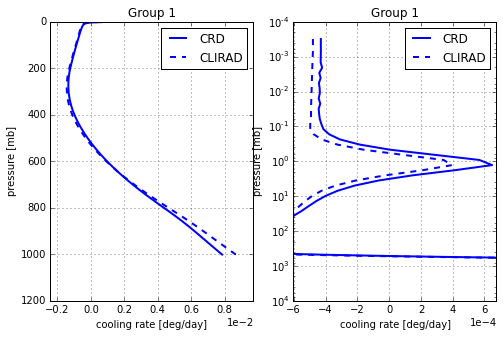

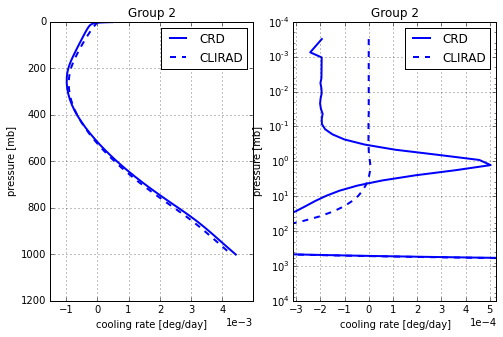

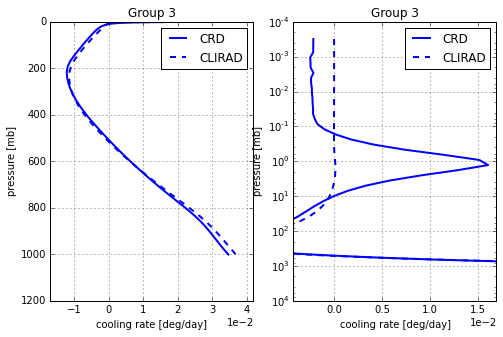

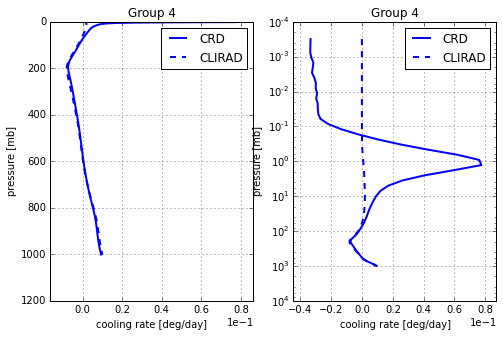

In [19]:
for g in ds_coolrg.coords['g']:
    srs_crd = ds_coolrg['coolrg'].sel(g=g).to_pandas()
    srs_clirad = ds_coolrg_clirad['coolrg'].sel(g=g).to_pandas()
    
    srss = [srs_crd, srs_clirad]
    names = ['CRD', 'CLIRAD']
    colours = ['b', 'b']
    linestyles = ['-', '--']
    
    xlabel = 'cooling rate [deg/day]'
    ylabel = 'pressure [mb]'
    title = 'Group {}'.format(int(g))
    
    fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                    names=names,
                                                    colours=colours,
                                                    linestyles=linestyles,
                                                    xlabel=xlabel,
                                                    ylabel=ylabel,
                                                    title=title)

In [23]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')